In [3]:
import numpy as np, pandas as pd, pymysql, matplotlib, matplotlib.pyplot as plt, seaborn as sb

In [4]:
connection = pymysql.connect('194.116.76.192', 'bd7', 'bd7', 'final_project')

data = pd.read_sql("""SELECT car_id, start_time, end_time, nr_min, ST_X(start_pos) AS start_lon, ST_Y(start_pos) AS start_lat,
            ST_X(end_pos) AS end_lon, ST_Y(end_pos) AS end_lat
            FROM trips3 WHERE  start_time >= "2017-06-01 06:23:02" and end_time <= "2017-06-07 07:35:44"
            and nr_min > 30 and nr_min < 1440   """, connection, parse_dates=["start_time", "end_time"])

"OK"

'OK'

In [5]:
data['nrmin_bin'] = pd.to_numeric(pd.cut(data['nr_min'], 10).apply(lambda x: x.left)) # , labels = range(1,11)

In [12]:
data['time_bin'] = pd.to_numeric(data['start_time'].dt.hour)

In [7]:
data.agg({'start_time' : [np.min, np.max]})

,start_time
amin,2017-06-01 06:24:00
amax,2017-06-07 07:04:00


In [9]:
gb = data.groupby('time_bin').agg({'start_time' : [np.min, np.max, np.ma.count]})
gb

start_time                           
                        amin                amax  count
time_bin                                               
0        2017-06-02 00:00:00 2017-06-07 00:59:00   3541
1        2017-06-02 01:00:00 2017-06-07 01:58:00   2169
2        2017-06-02 02:00:00 2017-06-07 02:59:00   1868
3        2017-06-02 03:00:00 2017-06-07 03:59:00   5018
4        2017-06-02 04:00:00 2017-06-07 04:59:00  10303
5        2017-06-02 05:00:00 2017-06-07 05:59:00  28272
6        2017-06-01 06:24:00 2017-06-07 06:59:00  46489
7        2017-06-01 07:00:00 2017-06-07 07:04:00  44706
8        2017-06-01 08:00:00 2017-06-06 08:59:00  44593
9        2017-06-01 09:00:00 2017-06-06 09:59:00  46640
10       2017-06-01 10:00:00 2017-06-06 10:59:00  56339
11       2017-06-01 11:00:00 2017-06-06 11:59:00  45873
12       2017-06-01 12:00:00 2017-06-06 12:59:00  43353
13       2017-06-01 13:00:00 2017-06-06 13:59:00  42638
14       2017-06-01 14:00:00 2017-06-06 14:59:00  48760
15       2017-06-01 15:00:00 2017-06-06 15:59:00  57371
16       2017-06-01 16:00:00 2017-06-06 16:59:00  63678
17       2017-06-01 17:00:00 2017-06-06 17:59:00  59759
18       2017-06-01 18:00:00 2017-06-06 18:59:00  42159
19       2017-06-01 19:00:00 2017-06-06 19:59:00  28046
20       2017-06-01 20:00:00 2017-06-06 20:59:00  22997
21       2017-06-01 21:00:00 2017-06-06 21:59:00  19614
22       2017-06-01 22:00:00 2017-06-06 22:59:00  12576
23       2017-06-01 23:00:00 2017-06-06 23:59:00   6926

In [10]:
gb.head(10)

start_time                           
                        amin                amax  count
time_bin                                               
0        2017-06-02 00:00:00 2017-06-07 00:59:00   3541
1        2017-06-02 01:00:00 2017-06-07 01:58:00   2169
2        2017-06-02 02:00:00 2017-06-07 02:59:00   1868
3        2017-06-02 03:00:00 2017-06-07 03:59:00   5018
4        2017-06-02 04:00:00 2017-06-07 04:59:00  10303
5        2017-06-02 05:00:00 2017-06-07 05:59:00  28272
6        2017-06-01 06:24:00 2017-06-07 06:59:00  46489
7        2017-06-01 07:00:00 2017-06-07 07:04:00  44706
8        2017-06-01 08:00:00 2017-06-06 08:59:00  44593
9        2017-06-01 09:00:00 2017-06-06 09:59:00  46640

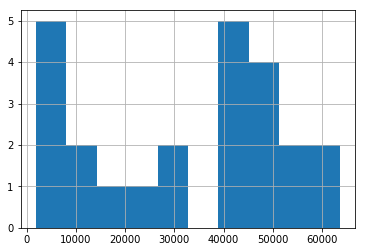

In [11]:
gb['start_time']['count'].hist()

/home/paul/virtualenv/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


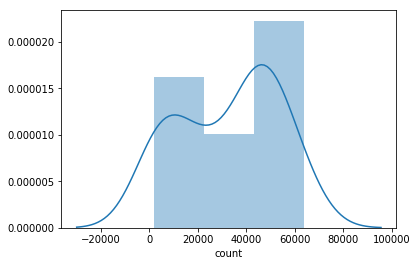

In [88]:
sb.distplot(gb['start_time']['count'])

In [6]:
data.head()

,car_id,start_time,end_time,nr_min,start_lon,start_lat,end_lon,end_lat,nrmin_bin,time_bin
0,3100010,2017-06-01 06:51:00,2017-06-01 10:34:00,223,7.634971,45.117004,7.634935,45.117012,171.800,6
1,3100010,2017-06-01 10:48:00,2017-06-01 11:54:00,66,7.765073,45.139168,7.765578,45.139442,29.592,10
2,3100010,2017-06-01 12:12:00,2017-06-01 17:53:00,341,7.635583,45.116783,7.635569,45.116714,312.600,12
3,3100010,2017-06-01 18:22:00,2017-06-02 16:41:00,1339,7.462153,45.065762,7.462328,45.066792,1298.200,18
4,3100010,2017-06-02 16:41:00,2017-06-02 17:16:00,35,7.462328,45.066792,7.666237,45.035934,29.592,16


In [7]:
def x():
    params = {'axes.titlesize':'60',
              'xtick.labelsize':'24',
              'ytick.labelsize':'24'}

    matplotlib.rcParams.update(params)

    plt.xticks(range(10))

    g = data.hist(column = "nrmin_bin", by="time_bin", figsize=(100,100), ylabelsize=80, xlabelsize=30,xrot=90)

    #[sp.set_xticklabels(data['nrmin_bin']) for sp in g.ravel()]

    g

In [10]:
#data.to_csv("/mnt/docs/Progetti/BigDive/Workspace/Final_Project/pandas_export.csv")